In questo esercizio non quadra che per calcolare il residui sul dataframe della "phase2" si utilizzano i dati della phase1 :/
ok usare il modello costruito in phase1 che dà nuovi fits, ma poi i residui dovrebbe essere calcolati rispetto ai dati di phase2!

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

# Import the dataset
data = pd.read_csv('July-1.csv')

# Inspect the dataset
print(data.head())
print(data.info)

   t     te
0  1  361.9
1  2  322.7
2  3  298.1
3  4  265.6
4  5  240.7
<bound method DataFrame.info of      t     te
0    1  361.9
1    2  322.7
2    3  298.1
3    4  265.6
4    5  240.7
5    6  213.7
6    7  194.5
7    8  164.8
8    9  150.8
9   10  135.5
10  11  123.3
11  12  114.7
12  13  104.8
13  14  104.3
14  15   89.8
15  16   80.0
16  17   66.4
17  18   60.9
18  19   51.9
19  20   50.3
20  21   50.5
21  22   46.7
22  23   38.5
23  24   29.0
24  25   35.0
25  26   39.0
26  27   32.0
27  28   22.9
28  29   26.1
29  30   19.6
30  31   16.0
31  32   18.8
32  33   10.5
33  34    3.4
34  35    8.8
35  36   10.9
36  37   10.2
37  38   11.1
38  39   13.5
39  40   13.9>


Number of points n = 40
Mean = 91.28


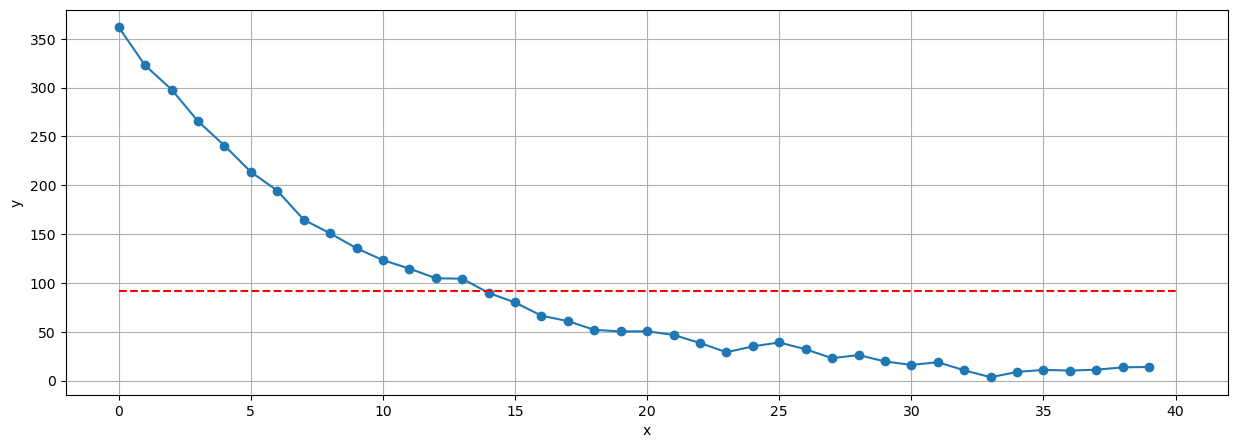

In [2]:
mf.single_ts_plot(data['te'])

In [3]:
data['exp'] = np.exp(-0.1*data['t'])

In [4]:

import statsmodels.api as sm
import qda
x = data['exp']#se solo un re gressore togli le doppie quadre e metti singole
y = data['te']
model = sm.OLS(y, x).fit()
qda.summary(model)


REGRESSION EQUATION
-------------------
te =  + 392.366 exp

COEFFICIENTS
------------
Term    Coef  SE Coef  T-Value    P-Value
 exp 392.366   2.4627 159.3221 1.6902e-56

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
5.2252 0.9985     0.9984

ANALYSIS OF VARIANCE
---------------------
    Source   DF      Adj SS      Adj MS    F-Value    P-Value
Regression  1.0 695110.6413 695110.6413 25383.5216 1.6902e-56
       exp  1.0 695110.6413 695110.6413 25383.5216 1.6902e-56
     Error 39.0   1067.9887     27.3843        NaN        NaN
     Total 40.0 696178.6300         NaN        NaN        NaN


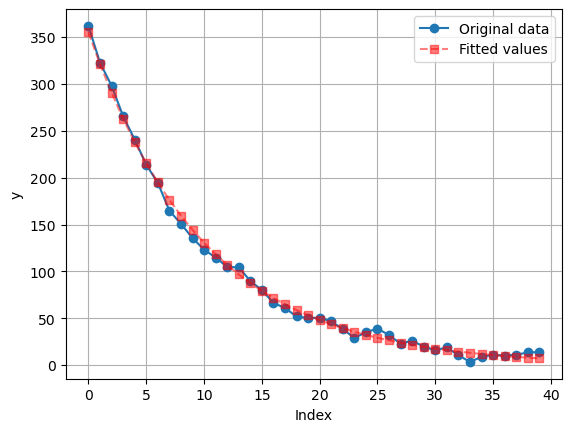

In [5]:
mf.plotyvsfits(y,model)

Shapiro-Wilk test p-value on the residuals = 0.734


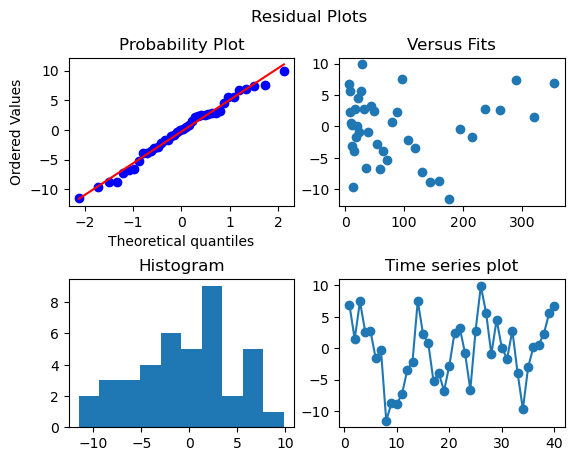

In [6]:
mf.shapirplusresplots(model)

In [7]:
mf.runs(model.resid)

Runs test statistic = -2.553
Runs test p-value = 0.011
Reject H0: the data are not random


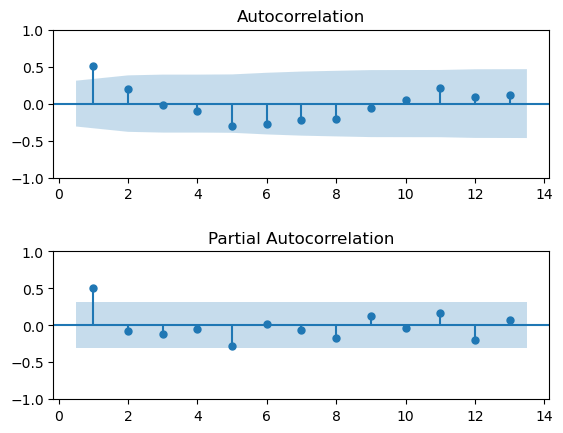

In [8]:
mf.acfpacf(model.resid)

In [9]:
mf.bartlett_test(model.resid,1,0.05)
#c'è corr in lag1

Test statistic rk = 0.509352
Rejection region starts at 0.309898
The null hypothesis is rejected


In [10]:
#inseriamo anche lag1
data['lag1'] = data['te'].shift(1)
import statsmodels.api as sm
import qda
regress1=data['exp'].iloc[1:]
regress2=data['lag1'].iloc[1:]
data4reg = pd.DataFrame({'exp': regress1, 'lag1': regress2})
x2 = data4reg[['exp','lag1']]
y2=data['te'].iloc[1:]
model2 = sm.OLS(y2, x2).fit()
qda.summary(model2)


REGRESSION EQUATION
-------------------
te =  + 157.846 exp + 0.537 lag1

COEFFICIENTS
------------
Term     Coef  SE Coef  T-Value  P-Value
 exp 157.8464  59.6547    2.646   0.0119
lag1   0.5370   0.1375    3.906   0.0004

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
4.3946 0.9987     0.9987

ANALYSIS OF VARIANCE
---------------------
    Source   DF      Adj SS      Adj MS    F-Value    P-Value
Regression  2.0 564491.6850 282245.8425 14598.8889 2.4694e-54
       exp  1.0    135.3593    135.3593     7.0013 1.1889e-02
      lag1  1.0    294.9596    294.9596    15.2565 3.8418e-04
     Error 37.0    715.3350     19.3334        NaN        NaN
     Total 39.0 565207.0200         NaN        NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.974


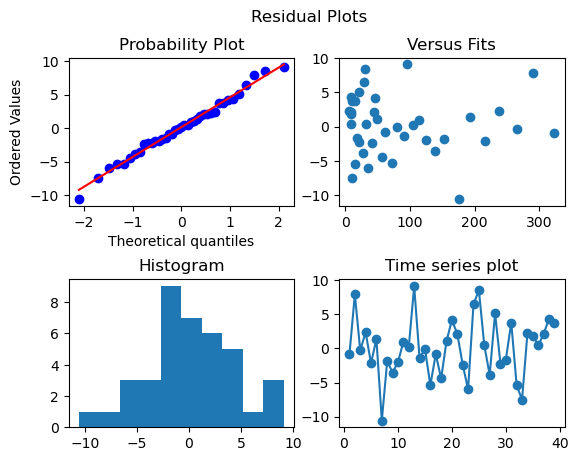

In [11]:
mf.shapirplusresplots(model2)

In [12]:
mf.runs(model2.resid)

Runs test statistic = -0.808
Runs test p-value = 0.419
Accept H0: the data are random


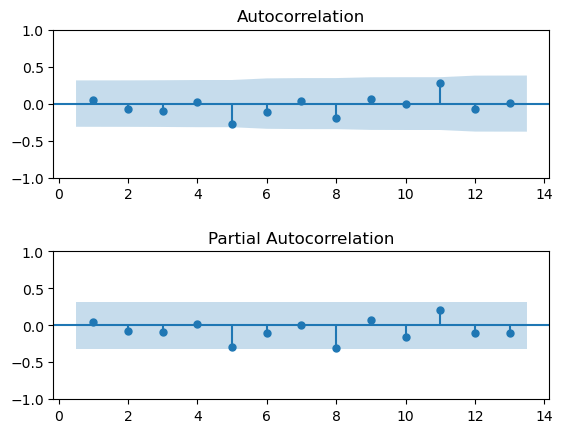

In [13]:
mf.acfpacf(model2.resid)

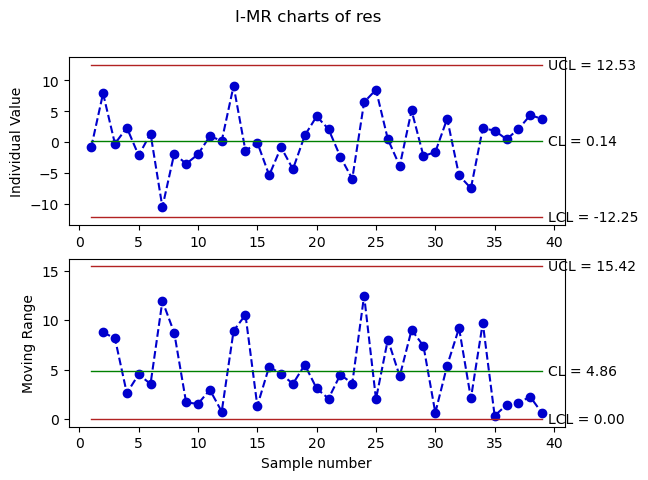

In [14]:
alpha=1/250
k_alpha=stats.norm.ppf(1-alpha/2)
df_SCC = pd.DataFrame({'res': model2.resid},) #lo chiamo direttamente df_SCC
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res',K=k_alpha)


In [15]:
data_ph2=pd.read_csv('July-1-2.csv')
print(data_ph2.head())
print(data_ph2.info())

   t     te
0  1  373.0
1  2  345.7
2  3  318.4
3  4  302.0
4  5  280.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       40 non-null     int64  
 1   te      40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes
None


In [16]:
data_ph2['exp'] = np.exp(-0.1*data_ph2['t'])
data_ph2['lag1']=data_ph2['te'].shift(1)

In [17]:
data_ph2.iloc[1:,2:].head()

,exp,lag1
1,0.8187,373.0
2,0.7408,345.7
3,0.6703,318.4
4,0.6065,302.0
5,0.5488,280.3


In [18]:
predictions_ph2=model2.predict(data_ph2.iloc[1:,2:])
residuals_ph2=data_ph2['te'].iloc[1:]-predictions_ph2

Number of points n = 39
Mean = 105.28


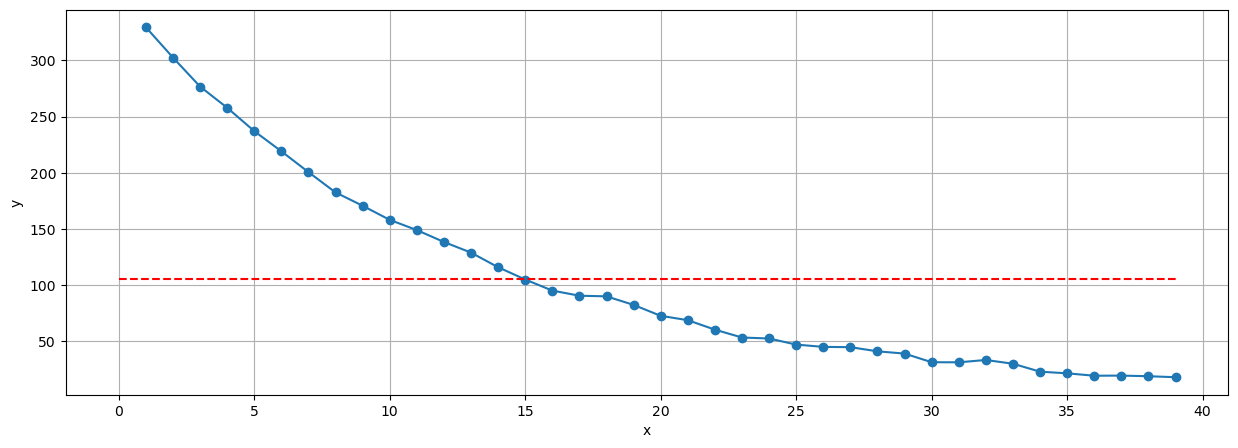

In [19]:
mf.single_ts_plot(predictions_ph2)

Number of points n = 39
Mean = 18.30


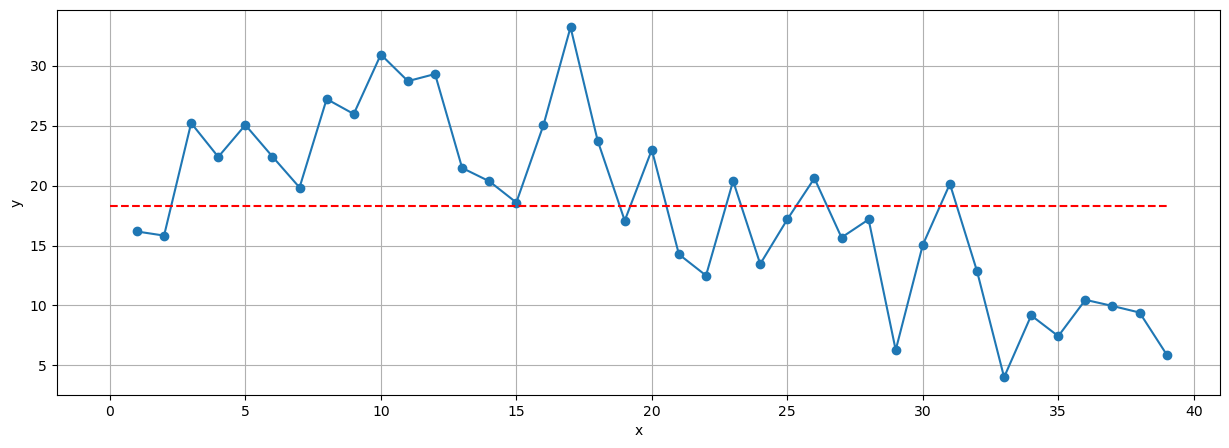

In [20]:
mf.single_ts_plot(residuals_ph2)

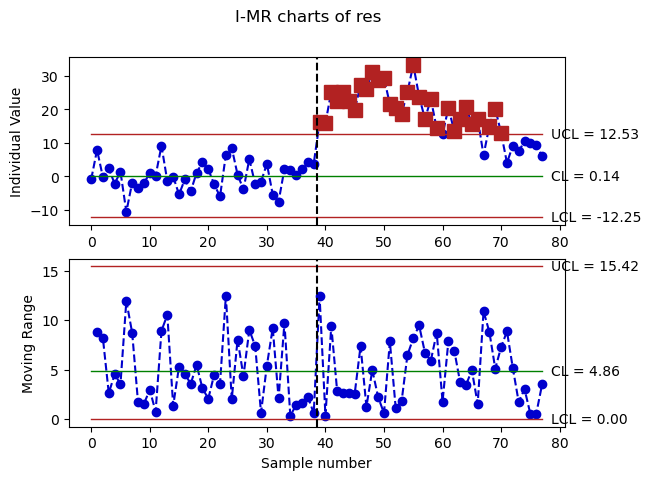

In [21]:
res_all= pd.concat([model2.resid, residuals_ph2], ignore_index=True)
df_SCC2 = pd.DataFrame({'res': res_all}) #lo chiamo direttamente df_SCC
df_SCC2 = qda.ControlCharts.IMR(df_SCC2, 'res',subset_size=len(model2.resid),K=k_alpha)

#pieno di OOC!!!!

Design and implement a statistical test of hypothesis to check whether the first and second 
components (referring to Table 1 and Table 2, respectively) have a cooling history that is statistically 
different or not.  

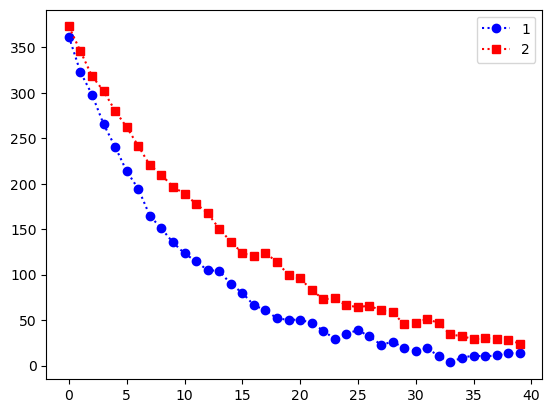

In [23]:
plt.plot(data['te'], 'o:b', label = '1') #'o:b' cerchi blu
plt.plot(data_ph2['te'], 's:r', label = '2')
plt.legend()
plt.show()

In [28]:

import statsmodels.api as sm
import qda
regress1=data['exp'].iloc[1:]
regress2=data['lag1'].iloc[1:]
data4reg = pd.DataFrame({'exp': regress1, 'lag1': regress2})
x2 = data4reg[['exp','lag1']]
y2=data['te'].iloc[1:]
model2 = sm.OLS(y2, x2).fit()
qda.summary(model2)

CI_beta1 = model2.conf_int(alpha=0.05).loc['exp']
CI_beta2 = model2.conf_int(alpha=0.05).loc['lag1']
print('The confidence interval for beta1 is [%.3f, %.3f]' % (CI_beta1[0], CI_beta1[1]))
print('The confidence interval for beta2 is [%.3f, %.3f]' % (CI_beta2[0], CI_beta2[1]))

REGRESSION EQUATION
-------------------
te =  + 157.846 exp + 0.537 lag1

COEFFICIENTS
------------
Term     Coef  SE Coef  T-Value  P-Value
 exp 157.8464  59.6547    2.646   0.0119
lag1   0.5370   0.1375    3.906   0.0004

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
4.3946 0.9987     0.9987

ANALYSIS OF VARIANCE
---------------------
    Source   DF      Adj SS      Adj MS    F-Value    P-Value
Regression  2.0 564491.6850 282245.8425 14598.8889 2.4694e-54
       exp  1.0    135.3593    135.3593     7.0013 1.1889e-02
      lag1  1.0    294.9596    294.9596    15.2565 3.8418e-04
     Error 37.0    715.3350     19.3334        NaN        NaN
     Total 39.0 565207.0200         NaN        NaN        NaN
The confidence interval for beta1 is [36.975, 278.718]
The confidence interval for beta1 is [0.258, 0.816]


In [29]:

regress1=data_ph2['exp'].iloc[1:]
regress2=data_ph2['lag1'].iloc[1:]

import statsmodels.api as sm
import qda
data4reg_ph2 = pd.DataFrame({'exp': regress1, 'lag1': regress2})
x2_2 = data4reg_ph2[['exp','lag1']]
y2_2=data_ph2['te'].iloc[1:]
model2_2 = sm.OLS(y2_2, x2_2).fit()
qda.summary(model2_2)

CI_beta1 = model2_2.conf_int(alpha=0.05).loc['exp']
CI_beta2 = model2_2.conf_int(alpha=0.05).loc['lag1']
print('The confidence interval for beta1 is [%.3f, %.3f]' % (CI_beta1[0], CI_beta1[1]))
print('The confidence interval for beta3 is [%.3f, %.3f]' % (CI_beta2[0], CI_beta2[1]))


REGRESSION EQUATION
-------------------
te =  + 1.202 exp + 0.929 lag1

COEFFICIENTS
------------
Term   Coef  SE Coef  T-Value    P-Value
 exp 1.2021  13.7609   0.0874 9.3086e-01
lag1 0.9294   0.0258  36.0732 1.9557e-30

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
4.7324 0.9991      0.999

ANALYSIS OF VARIANCE
---------------------
    Source   DF      Adj SS      Adj MS    F-Value    P-Value
Regression  2.0 915183.7264 457591.8632 20409.4033 5.0529e-57
       exp  1.0      0.1711      0.1711     0.0076 9.3086e-01
      lag1  1.0  29175.4776  29175.4776  1301.2777 1.9557e-30
     Error 37.0    829.5636     22.4206        NaN        NaN
     Total 39.0 916013.2900         NaN        NaN        NaN
The confidence interval for beta1 is [-26.680, 29.084]
The confidence interval for beta1 is [0.877, 0.982]


In [36]:
beta1_ph1=model2.params[0]
beta1_ph2=model2_2.params[0]
beta1_se=model2.bse[0]
beta2_se=model2_2.bse[0]
dof=len(y2_2)-2